# Software Mentions mention type comparison

## Comparison of CSM and CZI mention types after Howison & Bullard (2015) with Howison & Bullard

The mention types are those used in Howison & Bullard 2015 (doi:10.1002/asi.23538).
We did not use the following annotations:

- *Cite to users manual*
- *Not even name mentioned*

In [1]:
import pandas as pd

# Read the dataset
df = pd.read_csv(r'../data/access_study/CSM_sampled_mention_access.csv', encoding='unicode_escape', engine='python', index_col=False).fillna(0)
# Get the raw annotations for mention type
raw_types = df['Mention Type']

# Have a peep at the mention counts
mentions_total = len(raw_types)
print(mentions_total)

# Build a list of single types, i.e., split and strip comma-separated values
types = []
for separated in raw_types:
    vals = separated.split(',')
    vals = [v.strip() for v in vals]
    types.extend(vals)
# Create a dataframe for just the single types, sorted alphabetically
type_df = pd.DataFrame(data=types, columns=['CSM']).sort_values(by='CSM')
# Create a new dataframe including the counts for the single types
counts_df = pd.DataFrame(type_df['CSM'].value_counts())
# counts_df.rename(columns = {'Type':'CSM'}, inplace=True)
# Insert the actual types, which are the index right now, into its own column
print(counts_df)
# counts_df.insert(0, 'Type',counts_df.index)

# counts_df = counts_df.reindex(['PUB', 'MAN', 'PRO', 'INS', 'URL', 'NAM'])
csm_mentions = counts_df.to_dict()
print(counts_df)
csm_mentions = csm_mentions['CSM']
csm_mentions['MAN'] = 0
csm_mentions


80
     CSM
NAM   31
PUB   22
INS   17
URL   12
PRO    5
     CSM
NAM   31
PUB   22
INS   17
URL   12
PRO    5


{'NAM': 31, 'PUB': 22, 'INS': 17, 'URL': 12, 'PRO': 5, 'MAN': 0}

In [2]:
import pandas as pd

# Read the dataset
df_czi = pd.read_csv(r'../data/czi-software-mentions/sample_1000_annotated_100_licenses.csv', encoding='unicode_escape', engine='python', index_col=False).fillna(0)
# Get the raw annotations for mention type
raw_types = df_czi['MAIN']

# Have a peep at the mention counts
mentions_total_czi = len(raw_types)
print(mentions_total_czi)

# Build a list of single types, i.e., split and strip comma-separated values
types = []
for separated in raw_types:
    vals = separated.split(',')
    vals = [v.strip() for v in vals]
    types.extend(vals)
# Create a dataframe for just the single types, sorted alphabetically
type_df_czi = pd.DataFrame(data=types, columns=['Type']).sort_values(by='Type')
# Create a new dataframe including the counts for the single types
counts_df_czi = pd.DataFrame(type_df_czi['Type'].value_counts())
counts_df_czi.rename(columns = {'Type':'CZI'}, inplace=True)
# Insert the actual types, which are the index right now, into its own column
counts_df_czi.insert(0, 'Type',counts_df_czi.index)
counts_df_czi = counts_df_czi.reindex(['PUB', 'MAN', 'PRO', 'INS', 'URL', 'NAM'])
counts_df_czi


100


,Type,CZI
PUB,PUB,30
MAN,MAN,1
PRO,PRO,5
INS,INS,9
URL,URL,8
NAM,NAM,47


Add the data from Howison & Bullard 2005, Table 1.

In [3]:
hb_mentions = {
    'PUB': 105,
    'MAN': 6, # Citing user manual
    'PRO': 15,
    'INS': 53,
    'URL': 13,
    'NAM': 90,
    'NEN': 4 # Not even name mentioned
}

# We have no evidence for NEN in our samples, so drop these from the H&B data
del hb_mentions['NEN']

hb_mentions

{'PUB': 105, 'MAN': 6, 'PRO': 15, 'INS': 53, 'URL': 13, 'NAM': 90}

Add the Howison & Bullard data to the dataframe.

In [4]:
# Our no. of mentions
print('No. of mentions in CSM sample: ' + str(mentions_total))
print('No. of mentions in CZI sample: ' + str(mentions_total_czi))

# H & B number of mentions
hb_mentions_total = sum(hb_mentions.values())
print('No. of mentions in Howison & Bullard 2005 data: ' + str(hb_mentions_total))

# Add data to dataframe
counts_df_czi['hb'] = counts_df_czi['Type'].map(hb_mentions)
# counts_df['CZI'] = counts_df['Type'].map(czi_mentions)
counts_df_czi['CSM'] = counts_df_czi['Type'].map(csm_mentions)
counts_df = counts_df_czi.copy(deep=True)

No. of mentions in CSM sample: 80
No. of mentions in CZI sample: 100
No. of mentions in Howison & Bullard 2005 data: 282


Calculate percentages for both datasets, and add respective columns to the dataframe.

In [5]:
counts_df. insert(2, '%CZI', counts_df['CZI']/counts_df['CZI'].sum()*100)
counts_df. insert(2, '%CSM', counts_df['CSM']/counts_df['CSM'].sum()*100)
counts_df. insert(4, '%hb', counts_df['hb']/counts_df['hb'].sum()*100)
counts_df['%CSM'] = counts_df['%CSM'].round(decimals = 1)
counts_df['%CZI'] = counts_df['%CZI'].round(decimals = 1)
counts_df['%hb'] = counts_df['%hb'].round(decimals = 1)
counts_df

,Type,CZI,%CSM,%CZI,%hb,hb,CSM
PUB,PUB,30,25.3,30.0,37.2,105,22
MAN,MAN,1,0.0,1.0,2.1,6,0
PRO,PRO,5,5.7,5.0,5.3,15,5
INS,INS,9,19.5,9.0,18.8,53,17
URL,URL,8,13.8,8.0,4.6,13,12
NAM,NAM,47,35.6,47.0,31.9,90,31


Transpose the dataframe and print it as a LaTeX table.

In [6]:
df_transposed = counts_df.transpose()
print(df_transposed.to_latex())
df_transposed

\begin{tabular}{lllllll}
\toprule
{} &   PUB &  MAN &  PRO &   INS &   URL &   NAM \\
\midrule
Type &   PUB &  MAN &  PRO &   INS &   URL &   NAM \\
CZI  &    30 &    1 &    5 &     9 &     8 &    47 \\
\%CSM &  25.3 &  0.0 &  5.7 &  19.5 &  13.8 &  35.6 \\
\%CZI &  30.0 &  1.0 &  5.0 &   9.0 &   8.0 &  47.0 \\
\%hb  &  37.2 &  2.1 &  5.3 &  18.8 &   4.6 &  31.9 \\
hb   &   105 &    6 &   15 &    53 &    13 &    90 \\
CSM  &    22 &    0 &    5 &    17 &    12 &    31 \\
\bottomrule
\end{tabular}



/tmp/ipykernel_1776/3789131401.py:2: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df_transposed.to_latex())


,PUB,MAN,PRO,INS,URL,NAM
Type,PUB,MAN,PRO,INS,URL,NAM
CZI,30,1,5,9,8,47
%CSM,25.3,0.0,5.7,19.5,13.8,35.6
%CZI,30.0,1.0,5.0,9.0,8.0,47.0
%hb,37.2,2.1,5.3,18.8,4.6,31.9
hb,105,6,15,53,13,90
CSM,22,0,5,17,12,31


Create a horizontal stacked bar plot to compare the mention types across the two datasets.

\begin{tabular}{lllllll}
\toprule
{} &   PUB &  MAN &  PRO &   INS &   URL &   NAM \\
\midrule
Totals (CZI sample)              &    30 &    1 &    5 &     9 &     8 &    47 \\
\% (CSM sample)                   &  25.3 &  0.0 &  5.7 &  19.5 &  13.8 &  35.6 \\
\% (CZI sample)                   &  30.0 &  1.0 &  5.0 &   9.0 &   8.0 &  47.0 \\
\% (Howison \& Bullard (2015))     &  37.2 &  2.1 &  5.3 &  18.8 &   4.6 &  31.9 \\
Totals (Howison \& Bullard(2015)) &   105 &    6 &   15 &    53 &    13 &    90 \\
Totals (CSM sample)              &    22 &    0 &    5 &    17 &    12 &    31 \\
\bottomrule
\end{tabular}



/tmp/ipykernel_1776/2624808144.py:9: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(tab_df.to_latex())


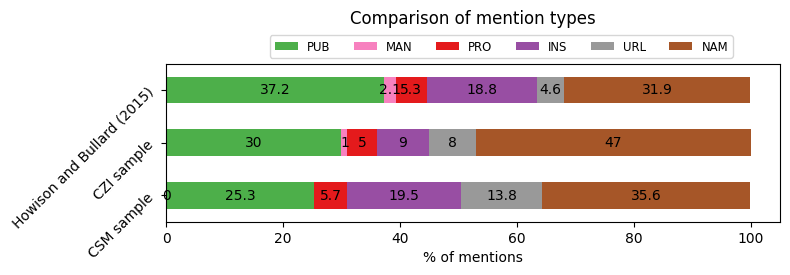

In [7]:
import matplotlib.pyplot as plt

# Transpose dataframe
types_df = counts_df.transpose()

# Output table first
tab_df = types_df.drop(['Type'], axis=0)
tab_df = tab_df.rename(index={'CZI': 'Totals (CZI sample)','CSM': 'Totals (CSM sample)', 'hb': 'Totals (Howison & Bullard(2015))', '%CZI': '% (CZI sample)','%CSM': '% (CSM sample)', '%hb': '% (Howison & Bullard (2015))'})
print(tab_df.to_latex())

# Drop unneeded data
types_df = types_df.drop(['Type', 'CZI', 'CSM', 'hb'], axis=0)
types_df.round(1)

# Rename cols
types_df = types_df.rename(index={'%CZI': 'CZI sample', '%CSM': 'CSM sample', '%hb': 'Howison and Bullard (2015)'})

# Colourblind/-friendly colours adapted from https://gist.github.com/thriveth/8560036
my_colors = ['#4daf4a', '#f781bf', '#e41a1c', '#984ea3', '#999999', '#a65628', '#dede00']

# Create the plot
# fig, ax1 = plt.subplots(nrows = 1)
ax = types_df.plot(kind='barh', 
                   stacked=True,
                   figsize=(8, 3), 
                   color=my_colors)
ax.legend(ncol=6, 
          bbox_to_anchor=(0.16, 1),
          loc='lower left', 
          fontsize='small')
ax.set_xlabel('% of mentions')

# Add a title and rotate the x-axis labels to be horizontal
plt.title('Comparison of mention types', y=1.2)
plt.xticks(rotation=0, ha='center')
plt.yticks(rotation=45)

# Add value labels to bar sections
for c in ax.containers:
    ax.bar_label(c, label_type='center')
    
# Format, save, and show the plot
plt.tight_layout()
plt.savefig('mention-type-comparison.pgf')
plt.show()

In [8]:
import matplotlib.pyplot as plt

# Transpose dataframe
#types_df = counts_df.transpose()
# print(types_df)

# Output table first
dftab = counts_df.copy(deep=True)
# dftab.drop(['Type'], inplace=True)

dftab.rename(columns={'%CZI': 'CZI %', 'CZI': 'CZI ∑', 'CSM': 'CSM ∑', '%CSM': 'CSM %', 'hb': 'Howison & Bullard ∑', '%hb': 'Howison & Bullard %'}, inplace=True)
#print(dftab)
cols = ['CZI ∑','CZI %','CSM ∑', 'CSM %', 'Howison & Bullard ∑', 'Howison & Bullard %']
dftab = dftab[cols]
dftab.columns = pd.MultiIndex.from_tuples([(c[0:-2], c[-1]) for c in dftab.columns])
print(dftab)
print(dftab.to_latex())

    CZI       CSM       Howison & Bullard      
      ∑     %   ∑     %                 ∑     %
PUB  30  30.0  22  25.3               105  37.2
MAN   1   1.0   0   0.0                 6   2.1
PRO   5   5.0   5   5.7                15   5.3
INS   9   9.0  17  19.5                53  18.8
URL   8   8.0  12  13.8                13   4.6
NAM  47  47.0  31  35.6                90  31.9
\begin{tabular}{lrrrrrr}
\toprule
{} & \multicolumn{2}{l}{CZI} & \multicolumn{2}{l}{CSM} & \multicolumn{2}{l}{Howison \& Bullard} \\
{} &   ∑ &     \% &   ∑ &     \% &                 ∑ &     \% \\
\midrule
PUB &  30 &  30.0 &  22 &  25.3 &               105 &  37.2 \\
MAN &   1 &   1.0 &   0 &   0.0 &                 6 &   2.1 \\
PRO &   5 &   5.0 &   5 &   5.7 &                15 &   5.3 \\
INS &   9 &   9.0 &  17 &  19.5 &                53 &  18.8 \\
URL &   8 &   8.0 &  12 &  13.8 &                13 &   4.6 \\
NAM &  47 &  47.0 &  31 &  35.6 &                90 &  31.9 \\
\bottomrule
\end{tabular}



/tmp/ipykernel_1776/744616399.py:17: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(dftab.to_latex())


\begin{tabular}{llll}
\toprule
{} & Good (PUB) & Okay (PRO, URL) & Poor (INS, NAM) \\
\midrule
CSM sample                 &       25.3 &            19.5 &            55.1 \\
CZI sample                 &       30.0 &            13.0 &            56.0 \\
Howison and Bullard (2015) &       37.2 &             9.9 &            50.7 \\
\bottomrule
\end{tabular}



/tmp/ipykernel_1776/2286097516.py:17: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(dfsum.to_latex())


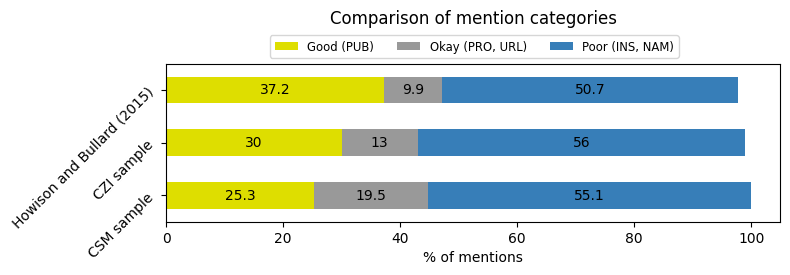

In [9]:
# Categorize

dfsum = df_transposed.copy(deep=True)

dfsum["Good (PUB)"] = dfsum["PUB"]
dfsum["Okay (PRO, URL)"] = dfsum["PRO"] + dfsum["URL"]
dfsum["Poor (INS, NAM)"] = dfsum["INS"] + dfsum["NAM"]


# Drop unneeded columns and rows
dfsum.drop(columns=['PUB', 'MAN', 'PRO', 'INS', 'URL', 'NAM'], inplace=True)
dfsum = dfsum.drop(labels=['Type', 'CZI', 'hb', 'CSM'])

# Plot
# Rename cols
dfsum = dfsum.rename(index={'%CZI': 'CZI sample', '%CSM': 'CSM sample', '%hb': 'Howison and Bullard (2015)'})
print(dfsum.to_latex())
# Colourblind/-friendly colours adapted from https://gist.github.com/thriveth/8560036
my_colors = ['#dede00', '#999999', '#377eb8']

# Create the plot
# fig, ax1 = plt.subplots(nrows = 1)
ax = dfsum.plot(kind='barh', 
                   stacked=True,
                   figsize=(8, 3), 
                   color=my_colors)
ax.legend(ncol=6, 
          bbox_to_anchor=(0.16, 1),
          loc='lower left', 
          fontsize='small')
ax.set_xlabel('% of mentions')

# Add a title and rotate the x-axis labels to be horizontal
plt.title('Comparison of mention categories', y=1.2)
plt.xticks(rotation=0, ha='center')
plt.yticks(rotation=45)

# Add value labels to bar sections
for c in ax.containers:
    ax.bar_label(c, label_type='center')
    
# Format, save, and show the plot
plt.tight_layout()
plt.savefig('mention-cat-comparison.pgf')
plt.show()